In [2]:
import sys, numpy as np, matplotlib, seaborn as sns, PIL
print(sys.executable)
print(np.__version__, matplotlib.__version__, sns.__version__)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/bin/python
2.3.5 3.10.7 0.13.2


# Task 1: Data Exploration and Visualization

## 1. Setup and Data Loading

In [23]:
from pathlib import Path

DATA_ROOT = Path("/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist")
print("Data root:", DATA_ROOT.resolve())
print("Splits:", [p.name for p in DATA_ROOT.iterdir() if p.is_dir()])

for split in ["train", "val", "test"]:
    n_files = sum(1 for _ in (DATA_ROOT / split).rglob("*.png"))
    print(split, n_files)


Data root: /Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist
Splits: ['test', 'train', 'val']
train 64000
val 16000
test 20000


In [24]:
from PIL import Image

sample_path = next((DATA_ROOT / "train").rglob("*.png"))
img = Image.open(sample_path)
print(sample_path)
print("mode:", img.mode)   # expect "L" (grayscale)
print("size:", img.size)   # expect (84, 84)


/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/797/75_797.png
mode: L
size: (84, 84)


## 2. Dataset Overview
Confirming image dimensions and format.

In [25]:
import matplotlib.pyplot as plt
import random

sample_images = random.sample(list((DATA_ROOT / "train").rglob("*.png")), 9)
print("Sample images:", sample_images)


Sample images: [PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/013/68_013.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/038/54_038.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/461/31_461.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/219/85_219.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/435/22_435.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/061/47_061.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/417/26_417.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/097/35_097.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/499

## 3. Visual Exploration
Displaying random samples from the training set.

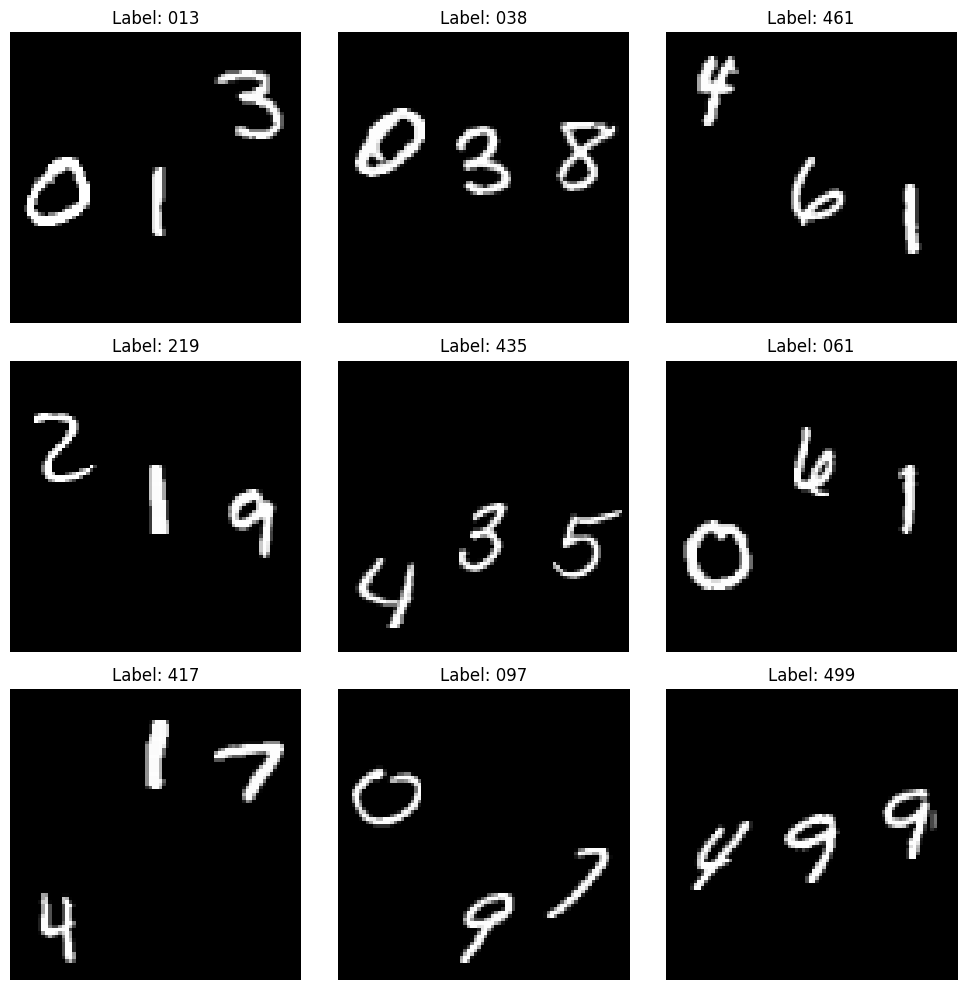

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), sample_images):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [27]:
# Get all labels from folder names
train_labels = [p.parent.name for p in (DATA_ROOT / "train").rglob("*.png")]
print(train_labels[:10])  # show first 10 labels
print(f"Total training images: {len(train_labels)}")
print(f"Unique labels: {len(set(train_labels))}")

# Count how many images per label
from collections import Counter
label_counts = Counter(train_labels)
print(label_counts)

# Show some stats
counts = list(label_counts.values())
print(f"Min images per label: {min(counts)}")
print(f"Max images per label: {max(counts)}")
print(f"Average images per label: {sum(counts) / len(counts):.1f}")

['797', '797', '797', '797', '797', '797', '797', '797', '797', '797']
Total training images: 64000
Unique labels: 640
Counter({'797': 100, '909': 100, '307': 100, '551': 100, '338': 100, '936': 100, '556': 100, '764': 100, '300': 100, '132': 100, '931': 100, '336': 100, '938': 100, '104': 100, '560': 100, '752': 100, '594': 100, '309': 100, '799': 100, '567': 100, '103': 100, '331': 100, '558': 100, '391': 100, '533': 100, '701': 100, '157': 100, '739': 100, '953': 100, '150': 100, '362': 100, '706': 100, '534': 100, '396': 100, '159': 100, '965': 100, '991': 100, '730': 100, '166': 100, '192': 100, '398': 100, '708': 100, '195': 100, '353': 100, '161': 100, '505': 100, '566': 100, '754': 100, '102': 100, '901': 100, '105': 100, '939': 100, '753': 100, '561': 100, '798': 100, '308': 100, '791': 100, '930': 100, '568': 100, '306': 100, '134': 100, '908': 100, '937': 100, '709': 100, '399': 100, '997': 100, '160': 100, '352': 100, '736': 100, '167': 100, '738': 100, '952': 100, '397': 1

## 4. Label Distribution Analysis
Analyzing the distribution of labels across the training set.

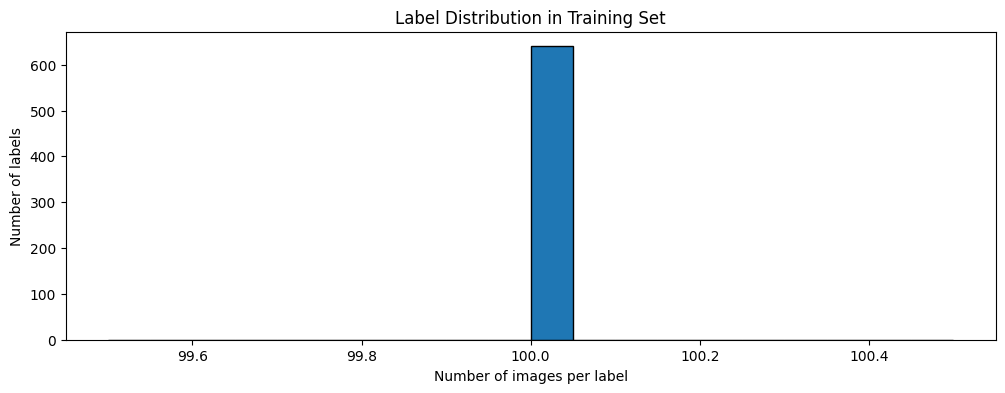

In [28]:
# Plot distribution
plt.figure(figsize=(12, 4))
plt.hist(counts, bins=20, edgecolor='black')
plt.xlabel('Number of images per label')
plt.ylabel('Number of labels')
plt.title('Label Distribution in Training Set')
plt.show()

## 5. Train vs Test Label Overlap
Checking if training and test sets share any labels.

In [29]:
test_labels = [p.parent.name for p in (DATA_ROOT / "test").rglob("*.png")]
print(f"Total test images: {len(test_labels)}")
print(f"Unique test labels: {len(set(test_labels))}")
test_unique = set(test_labels)
train_unique = set(train_labels)
print(f"Labels in test but not in train: {test_unique - train_unique}")
print(f"Labels in train but not in test: {len(train_unique - test_unique)}")

# Labels in BOTH train and test
overlap = test_unique & train_unique  # intersection
print(f"Labels in both: {len(overlap)}")
      

Total test images: 20000
Unique test labels: 200
Labels in test but not in train: {'865', '945', '765', '759', '530', '473', '717', '088', '222', '213', '323', '180', '480', '140', '608', '046', '087', '988', '493', '139', '513', '867', '077', '582', '271', '996', '842', '628', '481', '490', '782', '681', '680', '998', '296', '039', '176', '665', '762', '377', '068', '895', '321', '873', '630', '358', '823', '424', '154', '846', '047', '860', '862', '364', '098', '768', '257', '929', '781', '113', '638', '158', '647', '380', '304', '339', '552', '812', '815', '559', '076', '067', '843', '635', '885', '058', '129', '141', '817', '056', '745', '146', '451', '322', '340', '836', '411', '471', '742', '017', '224', '489', '588', '826', '096', '214', '510', '255', '357', '472', '460', '631', '135', '394', '073', '438', '244', '737', '342', '305', '467', '595', '428', '486', '806', '569', '359', '014', '440', '262', '615', '365', '496', '259', '412', '575', '420', '265', '884', '484', '208', 

## 6. Handwriting Variation Within Same Label
Demonstrating that same label does not mean identical images.

In [30]:
more_labels = [p for p in (DATA_ROOT / "train").rglob("*.png") if p.parent.name == "038"]
print(f"Number of images with label '038': {len(more_labels)}")
grid_labels = random.sample(more_labels, 6)

Number of images with label '038': 100


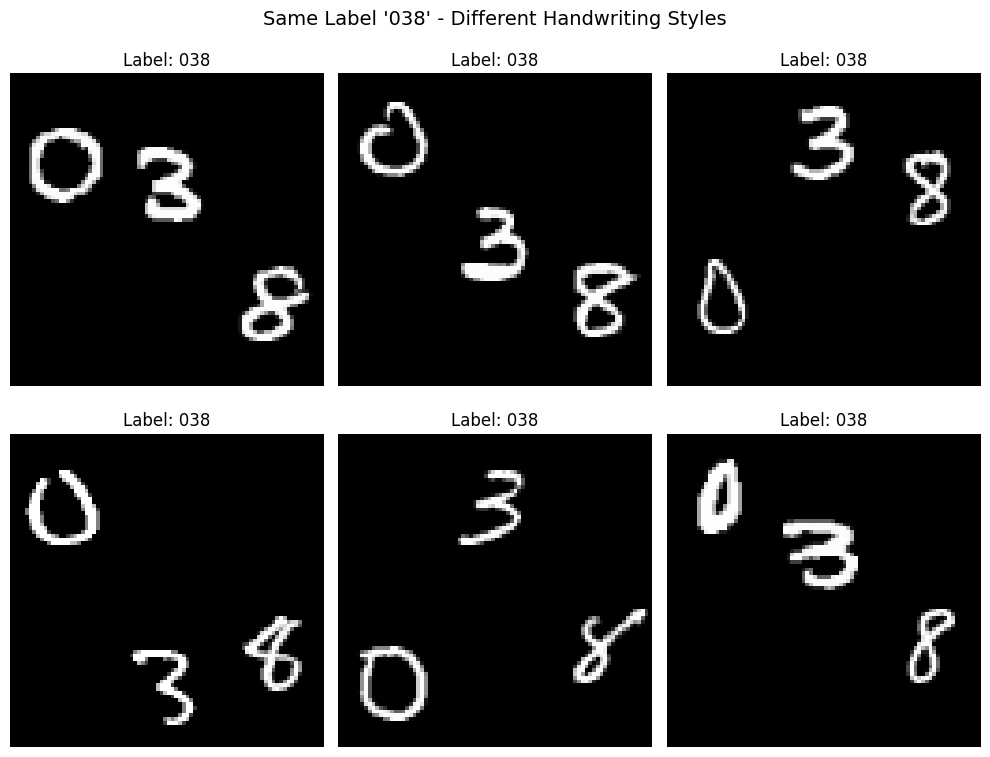

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle("Same Label '038' - Different Handwriting Styles", fontsize=14)

for ax, img_path in zip(axes.flatten(), grid_labels):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# **TASK TWO**


Loading and Flattening Code:

In [32]:
# Task 2: Baseline Models
from PIL import Image
import numpy as np
from pathlib import Path

def load_dataset(split):
    """Load images and labels for a given split (train/val/test)"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        # Load image and convert to numpy array
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Flatten: 84x84 → 7056
        img_flat = img_array.flatten()
        
        # Normalize: 0-255 → 0-1
        img_flat = img_flat / 255.0
        
        images.append(img_flat)
        labels.append(img_path.parent.name)  # e.g., "369"
    
    return np.array(images), np.array(labels)

# Load all splits
print("Loading training data...")
X_train, y_train = load_dataset("train")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print("Loading validation data...")
X_val, y_val = load_dataset("val")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

print("Loading test data...")
X_test, y_test = load_dataset("test")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Loading training data...
X_train shape: (64000, 7056), y_train shape: (64000,)
Loading validation data...
X_val shape: (16000, 7056), y_val shape: (16000,)
Loading test data...
X_test shape: (20000, 7056), y_test shape: (20000,)


## Logistic regerssion 

In [36]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
# base logistic regression model
log_reg = LogisticRegression(max_iter=1000)

In [39]:
print ("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("Training complete.")

Training Logistic Regression model...
Training complete.


Check accuracy on validation set

In [40]:
# Check accuracy on validation set
val_accuracy = log_reg.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 0.0000
Validation Accuracy: 0.00%


In [43]:
# Check validation labels overlap with training
val_labels_check = [p.parent.name for p in (DATA_ROOT / "val").rglob("*.png")]
val_unique = set(val_labels_check)

print(f"Unique validation labels: {len(val_unique)}")
print(f"Labels in both train and val: {len(train_unique & val_unique)}")

# Check training accuracy to confirm the model DID learn
train_accuracy = log_reg.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print("The model learned the training data, but can't generalize to unseen label combinations!")

Unique validation labels: 160
Labels in both train and val: 0

Training Accuracy: 100.00%
The model learned the training data, but can't generalize to unseen label combinations!


## Convolutional Neural Network (CNN)

In [44]:
# Install TensorFlow
!pip install tensorflow

  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 36.6 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 26.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.6 MB/s  0:00:00
Using cached flatbuffers-25.9.23-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 40.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 45.2 MB/s  0:00:00 eta 0:00:01
Using cached rich-14.2.0-py3-none-any.whl (243 kB)
Using cached markdown_it_py-4.0.0-py3-none-any.whl

In [45]:
# Load data in 2D format for CNN (not flattened!)
def load_dataset_2d(split):
    """Load images as 2D arrays for CNN"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Normalize: 0-255 → 0-1
        img_array = img_array / 255.0
        
        # DON'T flatten! Keep as 84x84
        images.append(img_array)
        labels.append(img_path.parent.name)
    
    return np.array(images), np.array(labels)

print("Loading training data (2D)...")
X_train_2d, y_train_2d = load_dataset_2d("train")
print(f"X_train_2d shape: {X_train_2d.shape}")  # Should be (64000, 84, 84)

print("Loading validation data (2D)...")
X_val_2d, y_val_2d = load_dataset_2d("val")
print(f"X_val_2d shape: {X_val_2d.shape}")

print("Loading test data (2D)...")
X_test_2d, y_test_2d = load_dataset_2d("test")
print(f"X_test_2d shape: {X_test_2d.shape}")

Loading training data (2D)...
X_train_2d shape: (64000, 84, 84)
Loading validation data (2D)...
X_val_2d shape: (16000, 84, 84)
Loading test data (2D)...
X_test_2d shape: (20000, 84, 84)


In [46]:
# Prepare data for CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# CNN expects shape: (samples, height, width, channels)
# We have: (64000, 84, 84)
# We need: (64000, 84, 84, 1)  ← the "1" means 1 color channel (grayscale)

X_train_cnn = X_train_2d.reshape(-1, 84, 84, 1)
X_val_cnn = X_val_2d.reshape(-1, 84, 84, 1)
X_test_cnn = X_test_2d.reshape(-1, 84, 84, 1)

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_val_cnn shape: {X_val_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")


# Convert string labels ("026", "348") to numbers (0, 1, 2, ...)
# Why? Neural networks need numbers, not strings!

label_encoder = LabelEncoder()
label_encoder.fit(y_train_2d)  # Learn all unique labels from training

y_train_encoded = label_encoder.transform(y_train_2d)
# y_val and y_test have labels NOT in training, so we handle them differently later

print(f"\nExample label conversion:")
print(f"  '{y_train_2d[0]}' → {y_train_encoded[0]}")
print(f"  '{y_train_2d[100]}' → {y_train_encoded[100]}")
print(f"\nTotal classes: {len(label_encoder.classes_)}")

X_train_cnn shape: (64000, 84, 84, 1)
X_val_cnn shape: (16000, 84, 84, 1)
X_test_cnn shape: (20000, 84, 84, 1)

Example label conversion:
  '797' → 508
  '909' → 579

Total classes: 640


In [47]:
# Build the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(640, activation='softmax')  # 640 classes
])

# Show the model architecture
model.summary()

/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 82, 82, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 640)            │        82,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,920 (9.56 MB)

 Trainable params: 2,505,920 (9.56 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Training CNN...")
history = model.fit(
    X_train_cnn, 
    y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,  # Use 10% of training data for validation during training
    verbose=1
)
print("Training complete!")

Training CNN...
Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.3268 - loss: 3.2811 - val_accuracy: 0.0000e+00 - val_loss: 62.5056
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 71s 40ms/step - accuracy: 0.8516 - loss: 0.4843 - val_accuracy: 0.0000e+00 - val_loss: 74.7349
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - accuracy: 0.9330 - loss: 0.2097 - val_accuracy: 0.0000e+00 - val_loss: 69.1699
Epoch 4/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.9582 - loss: 0.1251 - val_accuracy: 0.0000e+00 - val_loss: 71.4071
Epoch 5/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.9675 - loss: 0.0972 - val_accuracy: 0.0000e+00 - val_loss: 79.5648
Training complete!


In [49]:
# Check CNN accuracy on training data (should be high)
train_loss, train_accuracy = model.evaluate(X_train_cnn, y_train_encoded, verbose=0)
print(f"CNN Training Accuracy: {train_accuracy * 100:.2f}%")

# For the REAL validation set, we can't use label_encoder because
# the validation labels don't exist in training!
# Let's just check what the model predicts and see if ANY are correct

predictions = model.predict(X_val_cnn, verbose=0)
predicted_classes = predictions.argmax(axis=1)  # Get the class with highest probability
predicted_labels = label_encoder.inverse_transform(predicted_classes)  # Convert back to strings

# Count how many predictions match actual labels
correct = sum(pred == actual for pred, actual in zip(predicted_labels, y_val_2d))
val_accuracy = correct / len(y_val_2d)

print(f"CNN Validation Accuracy (real val set): {val_accuracy * 100:.2f}%")
print(f"Correct predictions: {correct} out of {len(y_val_2d)}")

CNN Training Accuracy: 88.38%
CNN Validation Accuracy (real val set): 0.00%
Correct predictions: 0 out of 16000


 # Hyperparameter tuning 
 

## Logistic regression fine tuning 


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to try
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],        # regularization strength
    'max_iter': [500, 1000, 2000],       # max iterations
    'solver': ['lbfgs', 'saga']          # optimization algorithm
}

# Create GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',
    verbose=1
)

# Fit on training data
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Results
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best training accuracy: {grid_search.best_score_:.4f}")

# Get the best model
best_log_reg = grid_search.best_estimator_

# Test on validation set
val_accuracy = best_log_reg.score(X_val, y_val)
print(f"\nValidation accuracy (after tuning): {val_accuracy * 100:.2f}%")
print("Note: Still 0% because validation labels don't exist in training data")

Starting hyperparameter tuning...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
